In [2]:
import cirq
import numpy as np

In [3]:
from cirq.aqt.aqt_device import get_aqt_device
from cirq.aqt.aqt_sampler import AQTSampler
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [4]:
access_token = '2633b2d14dae4d9da7c9df2503857334'

In [5]:
device, qubits = get_aqt_device(2)
print(device)

0───1


In [6]:
circuit = cirq.Circuit(device=device)
circuit.append([cirq.H(qubits[0])])
circuit.append([cirq.H(qubits[1])])
#circuit.append([cirq.CNOT(qubits[1], qubits[0])])
device.validate_circuit(circuit)
print(circuit, qubits)

0: ───Rx(π)───Ry(-0.5π)───

1: ───Rx(π)───Ry(-0.5π)─── [cirq.LineQubit(0), cirq.LineQubit(1)]


In [54]:
url = 'https://gateway.aqt.eu/marmot/sim/'
aqt_sampler = AQTSampler(url, access_token=access_token)
aqt_sweep = aqt_sampler.run(circuit, repetitions=20)

In [55]:
print(aqt_sweep)
a = getattr(aqt_sweep, 'measurements')
print(a)
b = a["m"]+0
a["m"]=b
print(a)
print(b.tolist().count([0,1]))

m=11101111111101111110, 01100110111101001110
{'m': array([[ True, False],
       [ True,  True],
       [ True,  True],
       [False, False],
       [ True, False],
       [ True,  True],
       [ True,  True],
       [ True, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [ True,  True],
       [ True, False],
       [ True, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False]])}
{'m': array([[1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0]])}
0


Counter({(3,): 10, (2,): 7, (0,): 3})


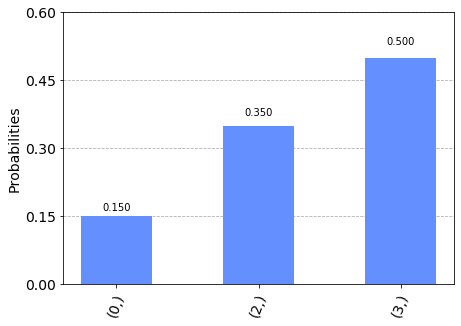

In [39]:
#cirq.plot_state_histogram(aqt_sweep)
counts = cirq.TrialResult.multi_measurement_histogram(aqt_sweep,keys=['m'])
print(counts)
plot_histogram(counts)